In [9]:
import pandas as pd
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import time
import numpy as np
import tensorflow as tf
from sklearn import metrics
from sklearn import linear_model
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
trainset = datasets.MNIST('./data', train=True, download=True)
testset = datasets.MNIST('./data', train=False)

In [3]:
df = pd.DataFrame(columns=['label']+[i for i in range(784)]);df

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783


In [14]:
n = len(trainset)
rst = np.zeros((n,785))
for i,(img,target) in enumerate(trainset):
    rst[i][0] = target
    rst[i][1:] = np.array(img).reshape(-1)

In [15]:
X = rst[:,1:]
y = rst[:,0]

In [16]:
X.shape,y.shape

((60000, 784), (60000,))

In [11]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X[:10000,:]) 

In [17]:
projX_tsne = pd.DataFrame(X_tsne)
projX_tsne.columns = ["comp_1", "comp_2"]
projX_tsne["labels"] = y[:10000]

<Figure size 720x720 with 0 Axes>

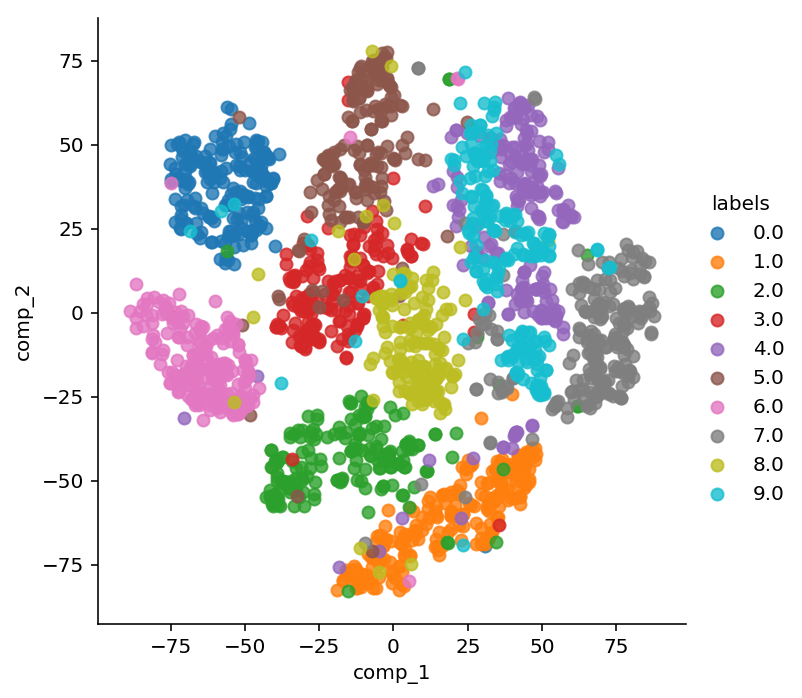

In [25]:
plt.figure(figsize=(10,10))
sns.lmplot("comp_1", "comp_2", hue = "labels", data = projX_tsne[:2000] ,fit_reg=False)